### Convolutions and Image Processing

This week we introduced the convolutional layer as a way to help with problems involving image classification.  This notebook reviews the big idea of a convolution and its basic useage in image classification.

In [ ]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [ ]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch

### Using `pytorch` to build convolutional network

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [ ]:
from IPython.display import Image

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 272kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 23.4MB/s]


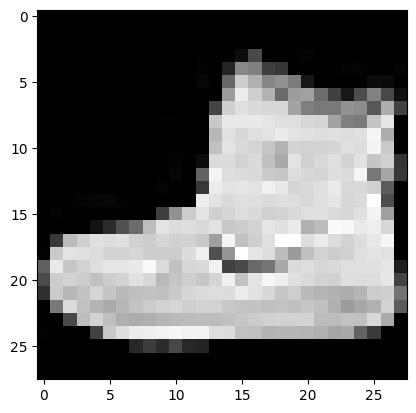

In [ ]:
train = FashionMNIST('.', download = True)
plt.imshow(train[0][0], cmap = 'gray')

In [ ]:
train = FashionMNIST('.', download = True, transform=ToTensor())
trainloader = DataLoader(train, batch_size = 32)

In [ ]:
train[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding = 1)

In [ ]:
output = conv1(train[0][0].unsqueeze(0))

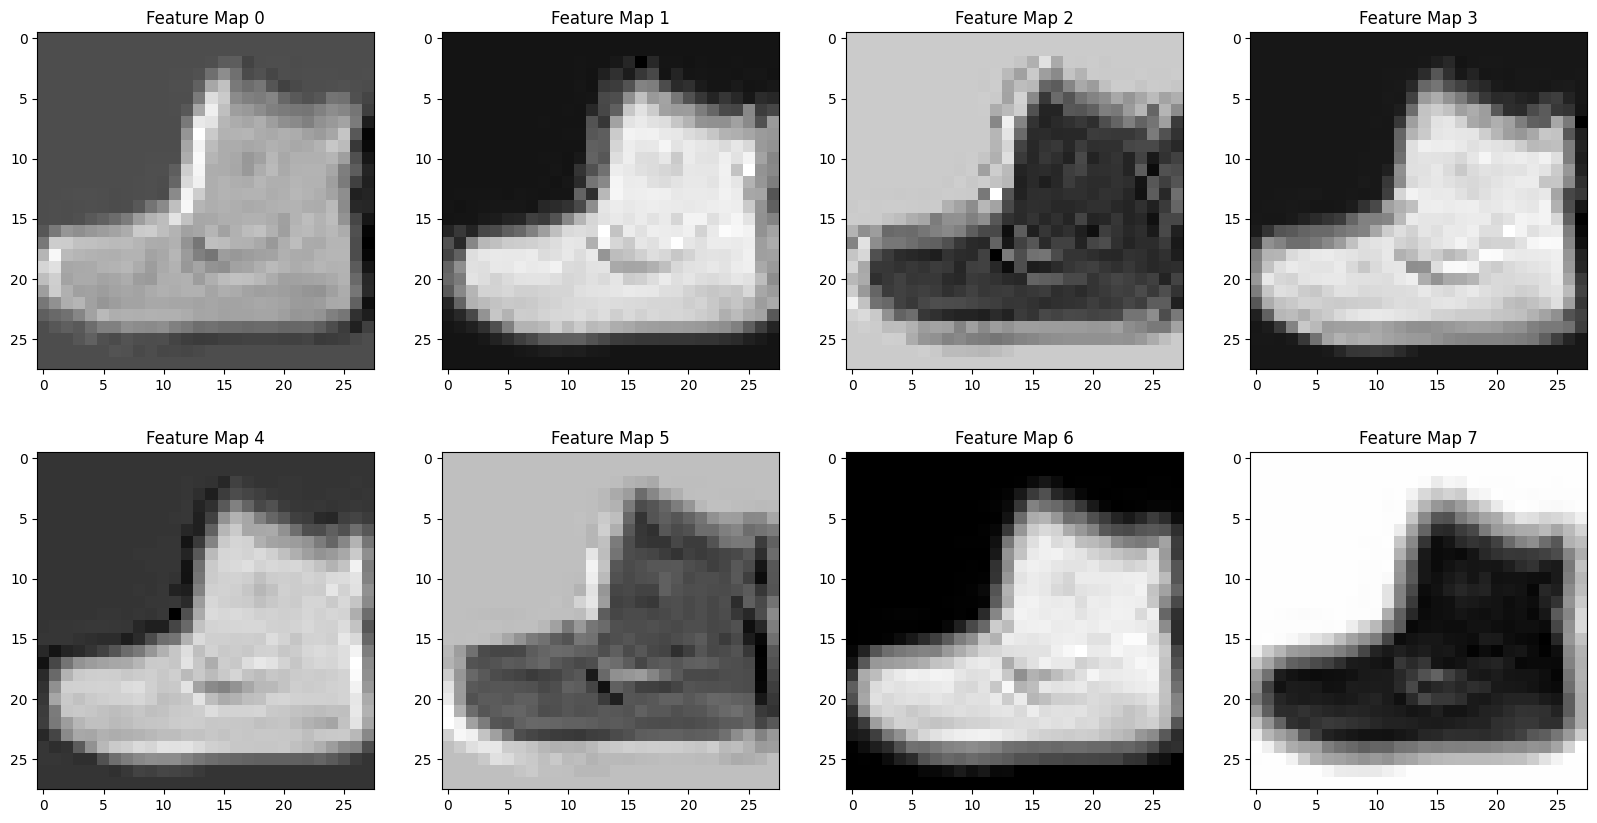

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(4):
    ax[i, j].imshow(output[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [ ]:
pool = nn.MaxPool2d(2)

In [ ]:
output_pool = pool(output)

In [ ]:
output_pool[0].shape

torch.Size([8, 14, 14])

In [ ]:
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding = 1)

In [ ]:
output_conv2 = conv2(output_pool)


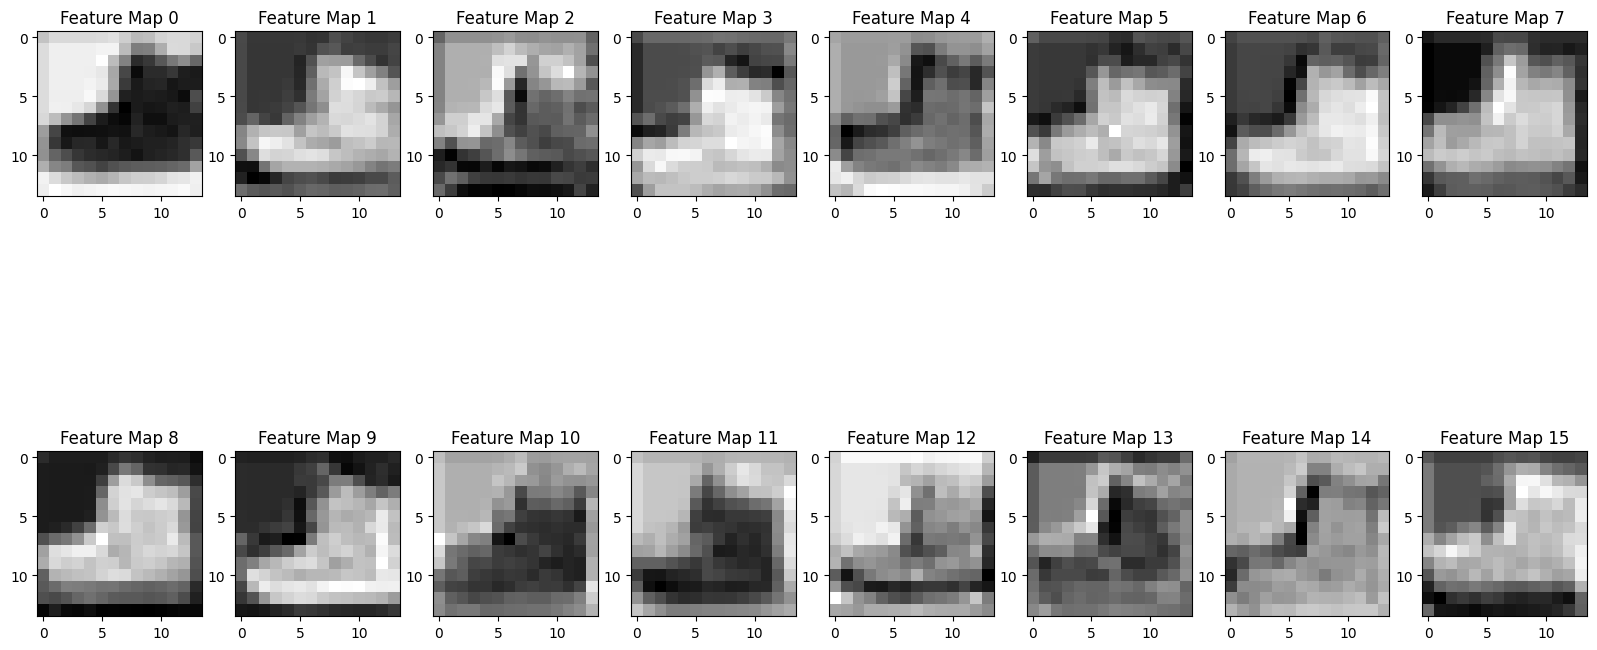

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(output_conv2[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [ ]:
flattener = nn.Flatten()

In [ ]:
flattener(output_conv2)

tensor([[ 0.0427,  0.1179,  0.1179,  ..., -0.1594, -0.1136, -0.0103]],
       grad_fn=<ViewBackward0>)

In [ ]:
flattener(pool(output_conv2)).shape

torch.Size([1, 784])

In [ ]:
16*7*7

784

In [ ]:
linear1 = nn.Linear(in_features=16*7*7, out_features=128)
linear2 = nn.Linear(in_features = 128, out_features = 10)
conv_activation = nn.Tanh()
linear_activation = nn.ReLU()

In [ ]:
model = nn.Sequential(conv1, conv_activation, pool, conv2, conv_activation, pool, flattener, linear1, linear_activation, linear2)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
from tqdm import tqdm

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [ ]:
losses = []
for epoch in tqdm(range(20)):
  for X, y in trainloader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:10<03:20, 10.57s/it]

Epoch 0 Loss: 0.6629740595817566


 10%|█         | 2/20 [00:19<02:55,  9.77s/it]

Epoch 1 Loss: 0.5343128442764282


 15%|█▌        | 3/20 [00:28<02:40,  9.44s/it]

Epoch 2 Loss: 0.44860565662384033


 20%|██        | 4/20 [00:37<02:29,  9.33s/it]

Epoch 3 Loss: 0.38885629177093506


 25%|██▌       | 5/20 [00:47<02:18,  9.23s/it]

Epoch 4 Loss: 0.34197932481765747


 30%|███       | 6/20 [00:56<02:08,  9.17s/it]

Epoch 5 Loss: 0.307361364364624


 35%|███▌      | 7/20 [01:05<01:58,  9.14s/it]

Epoch 6 Loss: 0.2783719301223755


 40%|████      | 8/20 [01:14<01:49,  9.14s/it]

Epoch 7 Loss: 0.2565946877002716


 45%|████▌     | 9/20 [01:23<01:40,  9.12s/it]

Epoch 8 Loss: 0.24090991914272308


 50%|█████     | 10/20 [01:32<01:31,  9.14s/it]

Epoch 9 Loss: 0.23110054433345795


 55%|█████▌    | 11/20 [01:41<01:22,  9.16s/it]

Epoch 10 Loss: 0.2232820689678192


 60%|██████    | 12/20 [01:50<01:13,  9.16s/it]

Epoch 11 Loss: 0.21878884732723236


 65%|██████▌   | 13/20 [02:00<01:03,  9.13s/it]

Epoch 12 Loss: 0.21140390634536743


 70%|███████   | 14/20 [02:09<00:54,  9.16s/it]

Epoch 13 Loss: 0.20766113698482513


 75%|███████▌  | 15/20 [02:18<00:45,  9.17s/it]

Epoch 14 Loss: 0.2042740136384964


 80%|████████  | 16/20 [02:27<00:36,  9.16s/it]

Epoch 15 Loss: 0.2048877328634262


 85%|████████▌ | 17/20 [02:36<00:27,  9.16s/it]

Epoch 16 Loss: 0.20367364585399628


 90%|█████████ | 18/20 [02:45<00:18,  9.19s/it]

Epoch 17 Loss: 0.20372508466243744


 95%|█████████▌| 19/20 [02:55<00:09,  9.18s/it]

Epoch 18 Loss: 0.20459863543510437


100%|██████████| 20/20 [03:04<00:00,  9.22s/it]

Epoch 19 Loss: 0.20183143019676208


In [ ]:
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

Exploring what the network is paying attention to by visualizing the results of the convolutions after being trained for 20 epochs.  

In [ ]:
x = train[0][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)


Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


In [ ]:
x.shape

torch.Size([16, 7, 7])

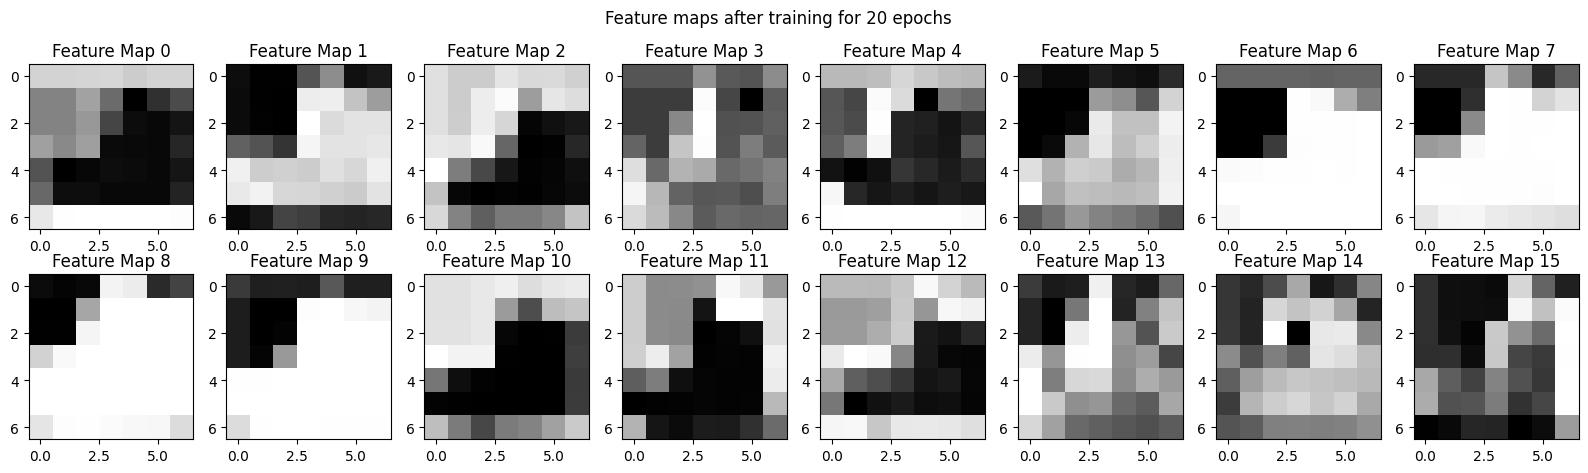

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [ ]:
x = train[1][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


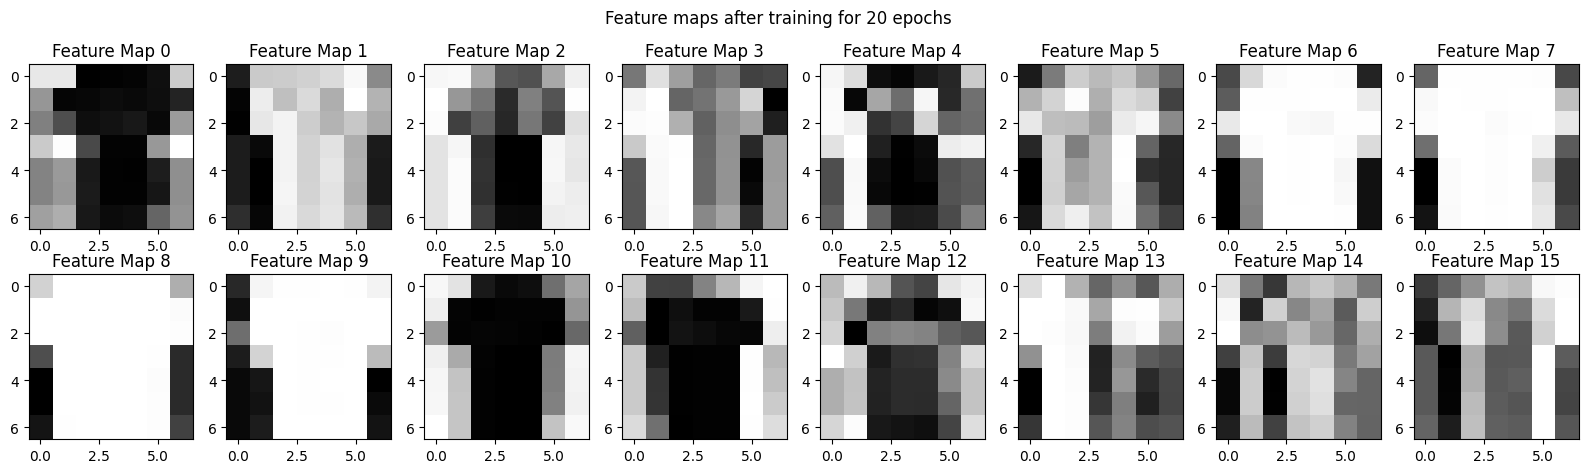

In [ ]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [ ]:
correct = 0
total = 0
for x, y in trainloader:
  x, y = x.to(device), y.to(device)
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [ ]:
correct/total

tensor(0.9146, device='cuda:0')

In [ ]:
torch.save(model, 'fashionmodel.pt')

**PROBLEM 2**

Below, a dataset containing 10 images of

In [ ]:
from torchvision.datasets import CIFAR10

In [ ]:
train = CIFAR10(root = '.', download = True, transform=ToTensor())

100%|██████████| 170M/170M [00:02<00:00, 58.6MB/s]


In [ ]:
train[0][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [ ]:
from torchvision.utils import make_grid

In [ ]:
grid = make_grid([train[i][0] for i in range(16)], nrow=4)

In [ ]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

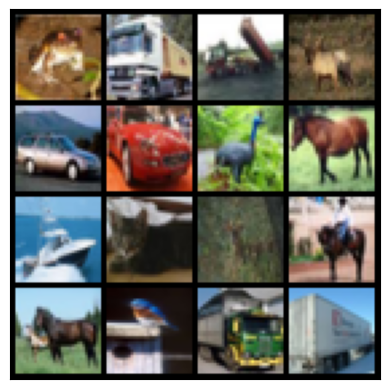

In [ ]:
show(grid)

In [ ]:
train[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

In [ ]:
#loading in the prebuilt model weights
weights = ResNet50_Weights.DEFAULT
#loads in the transformations to the images that need
#to happen before the image goes into the network
transforms = weights.transforms()

In [ ]:
#load model and weights
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 148MB/s]


In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
#changing the output of model to reflect my task
#(classify 10 images)
model.fc = nn.Linear(in_features=2048, out_features=10)

In [ ]:
trainloader = DataLoader(train, batch_size = 32)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from tqdm import tqdm

In [ ]:
model = model.to(device)
for epoch in tqdm(range(5)):
  for x,y in trainloader:
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

 20%|██        | 1/5 [01:05<04:21, 65.46s/it]

Epoch 0 Loss: 0.5219866633415222


 40%|████      | 2/5 [02:10<03:15, 65.24s/it]

Epoch 1 Loss: 0.055890388786792755


 60%|██████    | 3/5 [03:15<02:10, 65.13s/it]

Epoch 2 Loss: 0.006889087148010731


 80%|████████  | 4/5 [04:20<01:05, 65.10s/it]

Epoch 3 Loss: 0.002148648723959923


100%|██████████| 5/5 [05:25<00:00, 65.12s/it]

Epoch 4 Loss: 0.0011618565768003464


In [ ]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

tensor(0.9999, device='cuda:0')

In [ ]:
torch.save(model, 'cifarmodel.pt')

In [ ]:
weights = ResNet50_Weights.DEFAULT
transforms = weights.transforms()
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 222MB/s]


In [ ]:
model.fc = nn.Linear(2048, 2)

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/small/train/'

In [ ]:
train = ImageFolder(path, transform=transforms)
val = ImageFolder('drive/MyDrive/small/val/', transform = transforms)

In [ ]:
trainloader = DataLoader(train, batch_size = 32)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
model = model.to(device)
for epoch in tqdm(range(20)):
  for x,y in trainloader:
    #x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:12<04:04, 12.87s/it]

Epoch 0 Loss: 0.0431627556681633


 10%|█         | 2/20 [00:25<03:52, 12.92s/it]

Epoch 1 Loss: 0.0351223386824131


 15%|█▌        | 3/20 [00:38<03:39, 12.94s/it]

Epoch 2 Loss: 0.028443114832043648


 20%|██        | 4/20 [00:51<03:27, 12.99s/it]

Epoch 3 Loss: 0.022917399182915688


 25%|██▌       | 5/20 [01:04<03:14, 12.98s/it]

Epoch 4 Loss: 0.01838487759232521


 30%|███       | 6/20 [01:17<03:01, 12.94s/it]

Epoch 5 Loss: 0.014847773127257824


 35%|███▌      | 7/20 [01:30<02:49, 13.01s/it]

Epoch 6 Loss: 0.012187452986836433


 40%|████      | 8/20 [01:43<02:36, 13.01s/it]

Epoch 7 Loss: 0.010066842660307884


 45%|████▌     | 9/20 [01:56<02:22, 12.98s/it]

Epoch 8 Loss: 0.008431735448539257


 50%|█████     | 10/20 [02:09<02:09, 12.97s/it]

Epoch 9 Loss: 0.007215504068881273


 55%|█████▌    | 11/20 [02:22<01:56, 12.94s/it]

Epoch 10 Loss: 0.006246351636946201


 60%|██████    | 12/20 [02:35<01:43, 12.90s/it]

Epoch 11 Loss: 0.0054718018509447575


 65%|██████▌   | 13/20 [02:48<01:30, 12.91s/it]

Epoch 12 Loss: 0.004861629102379084


 70%|███████   | 14/20 [03:01<01:17, 12.87s/it]

Epoch 13 Loss: 0.004350932780653238


 75%|███████▌  | 15/20 [03:14<01:04, 12.90s/it]

Epoch 14 Loss: 0.003934111911803484


 80%|████████  | 16/20 [03:26<00:51, 12.91s/it]

Epoch 15 Loss: 0.00358751742169261


 85%|████████▌ | 17/20 [03:39<00:38, 12.94s/it]

Epoch 16 Loss: 0.003287259489297867


 90%|█████████ | 18/20 [03:52<00:25, 12.92s/it]

Epoch 17 Loss: 0.0030282086227089167


 95%|█████████▌| 19/20 [04:05<00:12, 12.91s/it]

Epoch 18 Loss: 0.002799178706482053


100%|██████████| 20/20 [04:18<00:00, 12.94s/it]

Epoch 19 Loss: 0.0026040617376565933


In [ ]:
torch.save(model, 'catdog.pt')

In [ ]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

tensor(0.9929, device='cuda:0')

In [ ]:
valloader = DataLoader(val, batch_size=32)

In [ ]:
correct = 0
total = 0
model = model.to(device)
model.eval()
for x,y in tqdm(valloader):
    x,y = x.to(device), y.to(device)
    #x = transforms(x)
    #x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

100%|██████████| 34/34 [02:51<00:00,  5.04s/it]


In [ ]:
correct/total

tensor(0.9803, device='cuda:0')

### HuggingFace

- [HuggingFace Models](https://huggingface.co/models)

In [ ]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image = pipe(prompt).images[0]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("image-classification", model="apple/mobilevit-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


model.safetensors:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

In [ ]:
from PIL import Image
im = Image.open("catpic.jpeg")

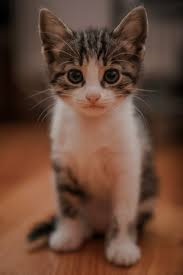

In [ ]:
im

In [ ]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
pipe(im)

[{'label': 'Egyptian cat', 'score': 0.812920093536377},
 {'label': 'tabby, tabby cat', 'score': 0.12199076265096664},
 {'label': 'tiger cat', 'score': 0.03855545073747635},
 {'label': 'lynx, catamount', 'score': 0.004755872767418623},
 {'label': 'Siamese cat, Siamese', 'score': 0.0008062412962317467}]